# What is Hierarchical clustering?
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters:

# Please UPVOTE if you like this kernel

# Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

# import required libraries for clustering
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Load dataset

In [ ]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [ ]:
# first five row
df.head()

In [ ]:
# size of datset
df.shape

In [ ]:
# change column name
df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'}, inplace=True)

In [ ]:
# statistical summary of numerical variables
df.describe()

In [ ]:
# summary about dataset
df.info()

# Exploratory data analysis

In [ ]:
# check for missing values
df.isna().sum() 

# Explore categorical variables

In [ ]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
cols = ['Age', 'Annual_income', 'Spending_score']

for col in cols:
    plt.hist(df[col],bins=15)
    plt.title('Histogram ' + col)
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.show()

In [ ]:
sns.pairplot(df,kind='scatter',hue='Gender',palette=('#40a1e6','#e64040'))
plt.show()

In [ ]:
cols = ['Age', 'Annual_income', 'Spending_score']

for col in cols:
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

# Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

# Feature Scaling

In [ ]:
# copy data
new_df = df.copy()

# drope customer id
new_df = new_df.drop('CustomerID', axis=1)

# view data after scaling
new_df.head()

# Building the Model

### Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

* Divisive
* Agglomerative.

### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two **closest points.**
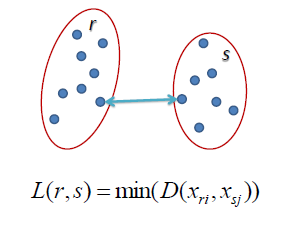

In [ ]:
# figure size
plt.figure(figsize=(19,8))

# Single linkage
mergings = linkage(new_df, method="single", metric='euclidean')

# diagram
dendrogram(mergings)
plt.show()

### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two **furthest points.**

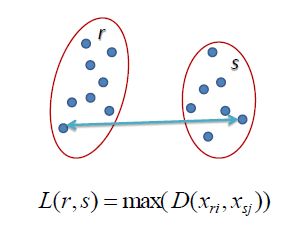

In [ ]:
# figure size
plt.figure(figsize=(19,8))

# Single linkage
mergings = linkage(new_df, method="complete", metric='euclidean')

# diagram
dendrogram(mergings)
plt.show()

### Average Linkage

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

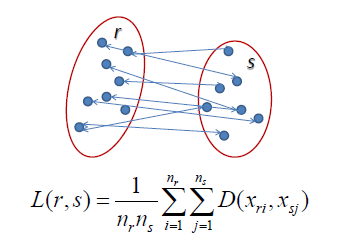

In [ ]:
# figure size
plt.figure(figsize=(19,8))

# Single linkage
mergings = linkage(new_df, method="average", metric='euclidean')

# diagram
dendrogram(mergings)
plt.show()

## Cutting the Dendrogram based on K

In [ ]:
# 2 clusters

cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

In [ ]:
# Assign cluster labels

new_df['Cluster_Labels'] = cluster_labels
new_df.head()

In [ ]:
# Plot Cluster Id vs Spending_score
for cols in new_df.columns[:-1].to_list():
    sns.boxplot(y=cols, x='Cluster_Labels', data=new_df)
    plt.show()

# Final Analysis
## Hierarchical Clustering with 2 Cluster Labels

* Customers with Cluster_Labels 0 average age is 35 with average annual salary is 55k and Cluster_Labels 1 average age is 45 with average annual salary is 80k.
* Customers with Cluster_Labels 0 spend more when compare with Customers with Cluster_Labels 1
* Customers with Cluster_Labels 0 annual income is less when compare with Customers with Cluster_Labels 1 but Customers with Cluster_Labels 0 spending score is much higher.